In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from scipy.stats import percentileofscore as pscore
from scipy.stats import false_discovery_control
import seaborn as sns
%config InlineBackend.figure_format='retina'

In [2]:
def triplet_str(subjectresults,i):
    s1 = subjectresults.iloc[i]['source1'][4:]
    s2 = subjectresults.iloc[i]['source2'][4:] 
    t  = subjectresults.iloc[i]['target'][4:]
    return s1 + ', ' + s2 + ' -> '+ t

In [5]:
folderin  = r"C:\Users\rober\NeuNet\ArithmeticTasks\resultsPID\task_surrogates"
folderout = r"C:\Users\rober\NeuNet\ArithmeticTasks\resultsPID\task_surrogates\condensed_results"

In [6]:
basedf =  pd.read_csv(folderin+"\Subject0_PID_task_surrogate0.csv")[['source1','source2','target']]
basedf

,source1,source2,target
0,EEG Fp1,EEG F3,EEG F7
1,EEG Fp1,EEG F7,EEG F3
2,EEG F3,EEG F7,EEG Fp1
3,EEG Fp1,EEG F3,EEG T3
4,EEG Fp1,EEG T3,EEG F3
...,...,...,...
985,EEG O2,EEG Pz,EEG Cz
986,EEG Cz,EEG Pz,EEG O2
987,EEG Fz,EEG Cz,EEG Pz
988,EEG Fz,EEG Pz,EEG Cz


In [5]:
# ---------- CÓDIGO PARA ESCRIBIR LAS SINERGIAS DE LOS SURROGATES EN UN SOLO DOCUMENTO .csv ----------
# for n in tqdm([32,33,34]):
#     allsynergies = {}
#     for i in range(50):
#         syns = pd.read_csv(folderin+"\Subject"+str(n)+"_PID_task_surrogate"+str(i)+".csv")['sinergy']
#         allsynergies['syn'+str(i+1)] = syns
#     subjectsyns = pd.concat([basedf,pd.DataFrame(allsynergies)],axis=1)
#     subjectsyns.to_csv(folderout+"\Subject"+str(n)+"_synsurrogates.csv",index=False)

In [6]:
sub_id    = 0
gaussurrs = pd.read_csv(folderout+r"\Subject"+str(sub_id)+"_synsurrogates.csv")

In [7]:
pathrealresult = r"C:\Users\rober\NeuNet\ArithmeticTasks\resultsPID\rest\Subject0_PID_rest.csv"
subjectresults = pd.read_csv(pathrealresult)

In [8]:
right_dists = [subjectresults.iloc[i]['sinergy']-max(gaussurrs.iloc[i][3:]) for i in range(990)]
left_dists  = [subjectresults.iloc[i]['sinergy']-min(gaussurrs.iloc[i][3:]) for i in range(990)]

In [9]:
mostsyn = np.argmax(right_dists)
mostsyn

824

In [10]:
leastsyn = np.argmin(left_dists)
leastsyn

826

1.0


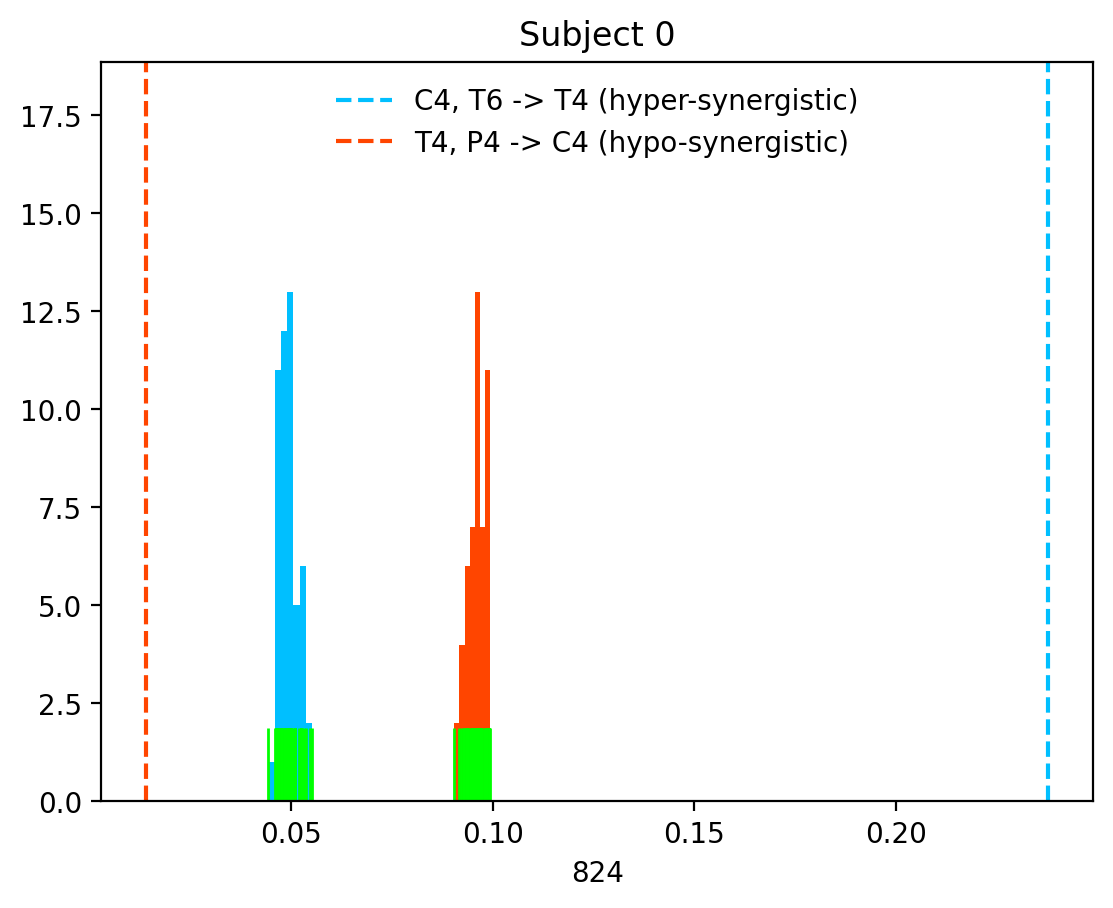

In [11]:
plt.hist(gaussurrs.iloc[mostsyn][3:],bins=7,color='deepskyblue');
plt.axvline(subjectresults.iloc[mostsyn]['sinergy'],c='deepskyblue',ls='--',
            label=triplet_str(subjectresults,mostsyn)+' (hyper-synergistic)')
sns.rugplot(data=gaussurrs.iloc[mostsyn][3:],height=0.1,color='lime')

plt.hist(gaussurrs.iloc[leastsyn][3:],bins=7,color='orangered');
plt.axvline(subjectresults.iloc[leastsyn]['sinergy'],c='orangered',
            label=triplet_str(subjectresults,leastsyn)+' (hypo-synergistic)',ls='--')
sns.rugplot(data=gaussurrs.iloc[leastsyn][3:],height=0.1,color='lime')
plt.title('Subject '+str(sub_id))

plt.legend(frameon=False)

print(max(left_dists)/max(np.abs(left_dists)))

In [12]:
hyper_syn_triplets = []
hypo_syn_triplets  = []

for sub_id in tqdm(list(range(35))):
    gaussurrs      = pd.read_csv(folderout+r"\Subject"+str(sub_id)+"_synsurrogates.csv")
    pathrealresult = r"C:\Users\rober\NeuNet\ArithmeticTasks\resultsPID\rest\Subject"+str(sub_id)+"_PID_rest.csv"
    subjectresults = pd.read_csv(pathrealresult)
    
    right_dists = [subjectresults.iloc[j]['sinergy']-max(gaussurrs.iloc[j][3:]) for j in range(990)]
    left_dists  = [subjectresults.iloc[j]['sinergy']-min(gaussurrs.iloc[j][3:]) for j in range(990)]
    
    mostsyn = np.argmax(right_dists)
    leastsyn = np.argmin(left_dists)
    
    hyper_syn_triplets.append((sub_id,mostsyn,triplet_str(subjectresults,mostsyn)))
    hypo_syn_triplets.append((sub_id,leastsyn,triplet_str(subjectresults,leastsyn)))

100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [00:40<00:00,  1.15s/it]


In [13]:
hyper_syn_triplets

[(0, 824, 'C4, T6 -> T4'),
 (1, 901, 'C4, O2 -> P4'),
 (2, 521, 'F4, Pz -> Fp2'),
 (3, 768, 'F8, C4 -> Fz'),
 (4, 152, 'F7, Fz -> F3'),
 (5, 445, 'T5, Pz -> P3'),
 (6, 44, 'F7, Fz -> Fp1'),
 (7, 58, 'Fp1, P3 -> T3'),
 (8, 940, 'T6, Pz -> P4'),
 (9, 901, 'C4, O2 -> P4'),
 (10, 361, 'T3, O1 -> P3'),
 (11, 745, 'F8, P4 -> T4'),
 (12, 431, 'Fz, Pz -> C3'),
 (13, 841, 'T4, P4 -> T6'),
 (14, 155, 'F7, Cz -> F3'),
 (15, 523, 'Fp2, T4 -> F8'),
 (16, 445, 'T5, Pz -> P3'),
 (17, 499, 'Fp2, T4 -> F4'),
 (18, 661, 'F4, P4 -> T4'),
 (19, 679, 'F4, P4 -> C4'),
 (20, 489, 'O1, Cz -> Pz'),
 (21, 745, 'F8, P4 -> T4'),
 (22, 406, 'C3, O1 -> P3'),
 (23, 340, 'T3, Cz -> C3'),
 (24, 576, 'Fp2, C4 -> Fz'),
 (25, 940, 'T6, Pz -> P4'),
 (26, 155, 'F7, Cz -> F3'),
 (27, 163, 'F3, T5 -> T3'),
 (28, 539, 'F8, Fz -> Fp2'),
 (29, 650, 'F8, Cz -> F4'),
 (30, 1, 'Fp1, F7 -> F3'),
 (31, 137, 'F7, T3 -> F3'),
 (32, 763, 'F8, P4 -> C4'),
 (33, 635, 'F8, C4 -> F4'),
 (34, 152, 'F7, Fz -> F3')]

In [30]:
surro_labels = ['syn'+str(i) for i in range(1,51)]
surro_labels

['syn1',
 'syn2',
 'syn3',
 'syn4',
 'syn5',
 'syn6',
 'syn7',
 'syn8',
 'syn9',
 'syn10',
 'syn11',
 'syn12',
 'syn13',
 'syn14',
 'syn15',
 'syn16',
 'syn17',
 'syn18',
 'syn19',
 'syn20',
 'syn21',
 'syn22',
 'syn23',
 'syn24',
 'syn25',
 'syn26',
 'syn27',
 'syn28',
 'syn29',
 'syn30',
 'syn31',
 'syn32',
 'syn33',
 'syn34',
 'syn35',
 'syn36',
 'syn37',
 'syn38',
 'syn39',
 'syn40',
 'syn41',
 'syn42',
 'syn43',
 'syn44',
 'syn45',
 'syn46',
 'syn47',
 'syn48',
 'syn49',
 'syn50']

In [31]:
folderout     = r"C:\Users\rober\NeuNet\ArithmeticTasks\resultsPID\rest_surrogates\condensed_results"
avg_syns_rest = basedf.copy()
for sub_id in tqdm(list(range(35))):
    gaussurrs_rest = pd.read_csv(folderout+r"\Subject"+str(sub_id)+"_synsurrogates.csv")
    surr_avgs_rest = pd.DataFrame(gaussurrs_rest[surro_labels].mean(axis=1),columns=['sub'+str(sub_id)])
    avg_syns_rest  = pd.concat([avg_syns_rest,surr_avgs_rest],axis=1)
    
global_avgs_rest = pd.DataFrame(avg_syns_rest[sub_labels].mean(axis=1),columns=['GlobalAverage'])

100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [00:01<00:00, 19.59it/s]


In [32]:
folderout = r"C:\Users\rober\NeuNet\ArithmeticTasks\resultsPID\task_surrogates\condensed_results"
avg_syns_task = basedf.copy()
for sub_id in tqdm(list(range(35))):
    gaussurrs_task = pd.read_csv(folderout+r"\Subject"+str(sub_id)+"_synsurrogates.csv")
    surr_avgs_task = pd.DataFrame(gaussurrs_task[surro_labels].mean(axis=1),columns=['sub'+str(sub_id)])
    avg_syns_task  = pd.concat([avg_syns_task,surr_avgs_task],axis=1)
    
global_avgs_task = pd.DataFrame(avg_syns_task[sub_labels].mean(axis=1),columns=['GlobalAverage'])

100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [00:01<00:00, 26.16it/s]


Text(0.5, 1.0, 'Gaussian Surrogates')

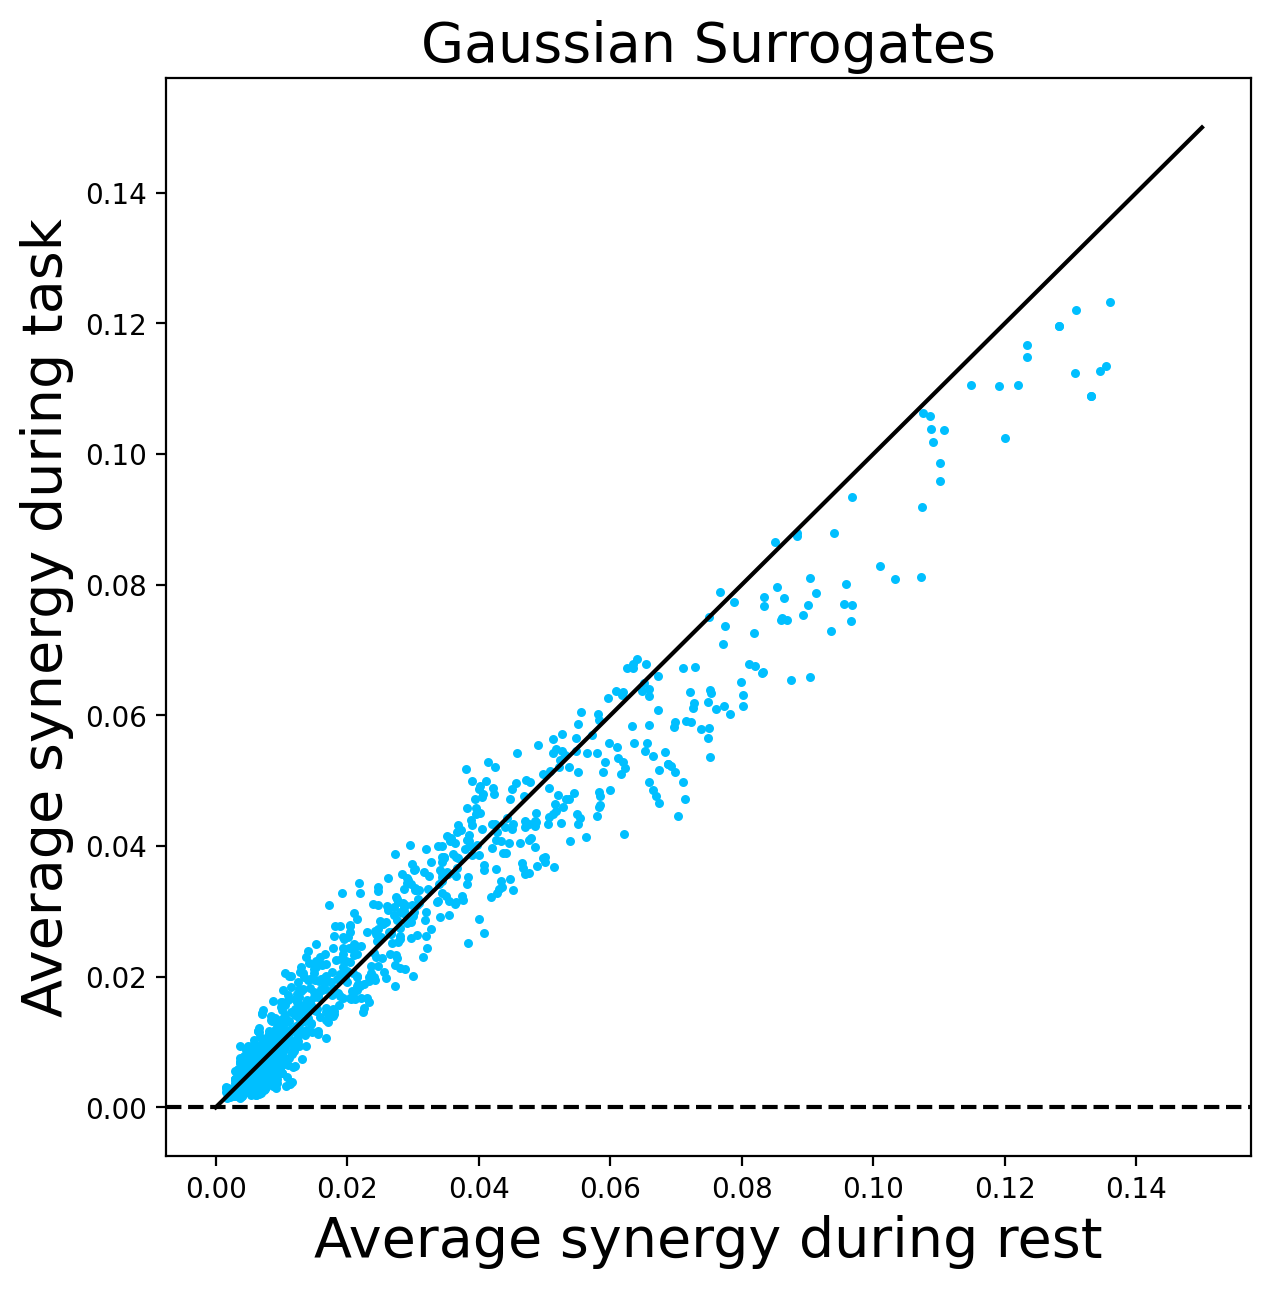

In [37]:
plt.figure(figsize=(7,7))
plt.scatter(global_avgs_rest,global_avgs_task,s=5,c='deepskyblue')
# plt.scatter(mean_task_syn,GlassLambda,s=2,c='deepskyblue')
plt.axhline(c='black',ls='--')
plt.xlabel('Average synergy during rest',fontsize=20)
plt.ylabel('Average synergy during task',fontsize=20)
plt.plot(np.linspace(0,0.15),np.linspace(0,0.15),c='black')
plt.title('Gaussian Surrogates',fontsize=20)

In [ ]:
folderout     = r"C:\Users\rober\NeuNet\ArithmeticTasks\resultsPID\rest_surrogates\condensed_results"
avg_syns_rest = basedf.copy()
for sub_id in tqdm(list(range(35))):
    gaussurrs_rest = pd.read_csv(folderout+r"\Subject"+str(sub_id)+"_synsurrogates.csv")
    surr_avgs_rest = pd.DataFrame(gaussurrs_rest[surro_labels].mean(axis=1),columns=['sub'+str(sub_id)])
    avg_syns_rest  = pd.concat([avg_syns_rest,surr_avgs_rest],axis=1)
    
global_avgs_rest = pd.DataFrame(avg_syns_rest[sub_labels].mean(axis=1),columns=['GlobalAverage'])

# Single surrogate 5 symbols discrete version

In [7]:
base_folder   =  r"C:\Users\rober\NeuNet\ArithmeticTasks\resultsPID\rest_surrogates\Subject"
columns       = ['source1','source2','target','sinergy','unique1','unique2','redundancy']
avg_syns_rest = basedf.copy()
for i in [str(n) for n in range(35)]:
    path       = base_folder + i + "_PID_rest_surrogate0_128Hz_NonBinary_5symbols.csv"
    surrs_pid  = pd.read_csv(path,usecols=columns)
    surrs_syns = pd.DataFrame(surrs_pid['sinergy']).rename(columns={'sinergy':'syn'+i})
    avg_syns_rest  = pd.concat([avg_syns_rest,surrs_syns],axis=1)
global_avgs_rest = avg_syns_rest[['syn'+str(n) for n in range(35)]].mean(axis=1)

In [8]:
base_folder   =  r"C:\Users\rober\NeuNet\ArithmeticTasks\resultsPID\task_surrogates\Subject"
avg_syns_task = basedf.copy()
for i in [str(n) for n in range(35)]:
    path       = base_folder + i + "_PID_task_surrogate0_128Hz_NonBinary_5symbols.csv"
    surrs_pid  = pd.read_csv(path,usecols=columns)
    surrs_syns = pd.DataFrame(surrs_pid['sinergy']).rename(columns={'sinergy':'syn'+i})
    avg_syns_task  = pd.concat([avg_syns_task,surrs_syns],axis=1)
global_avgs_task = avg_syns_task[['syn'+str(n) for n in range(35)]].mean(axis=1)

Text(0.5, 1.0, 'Gaussian Surrogates')

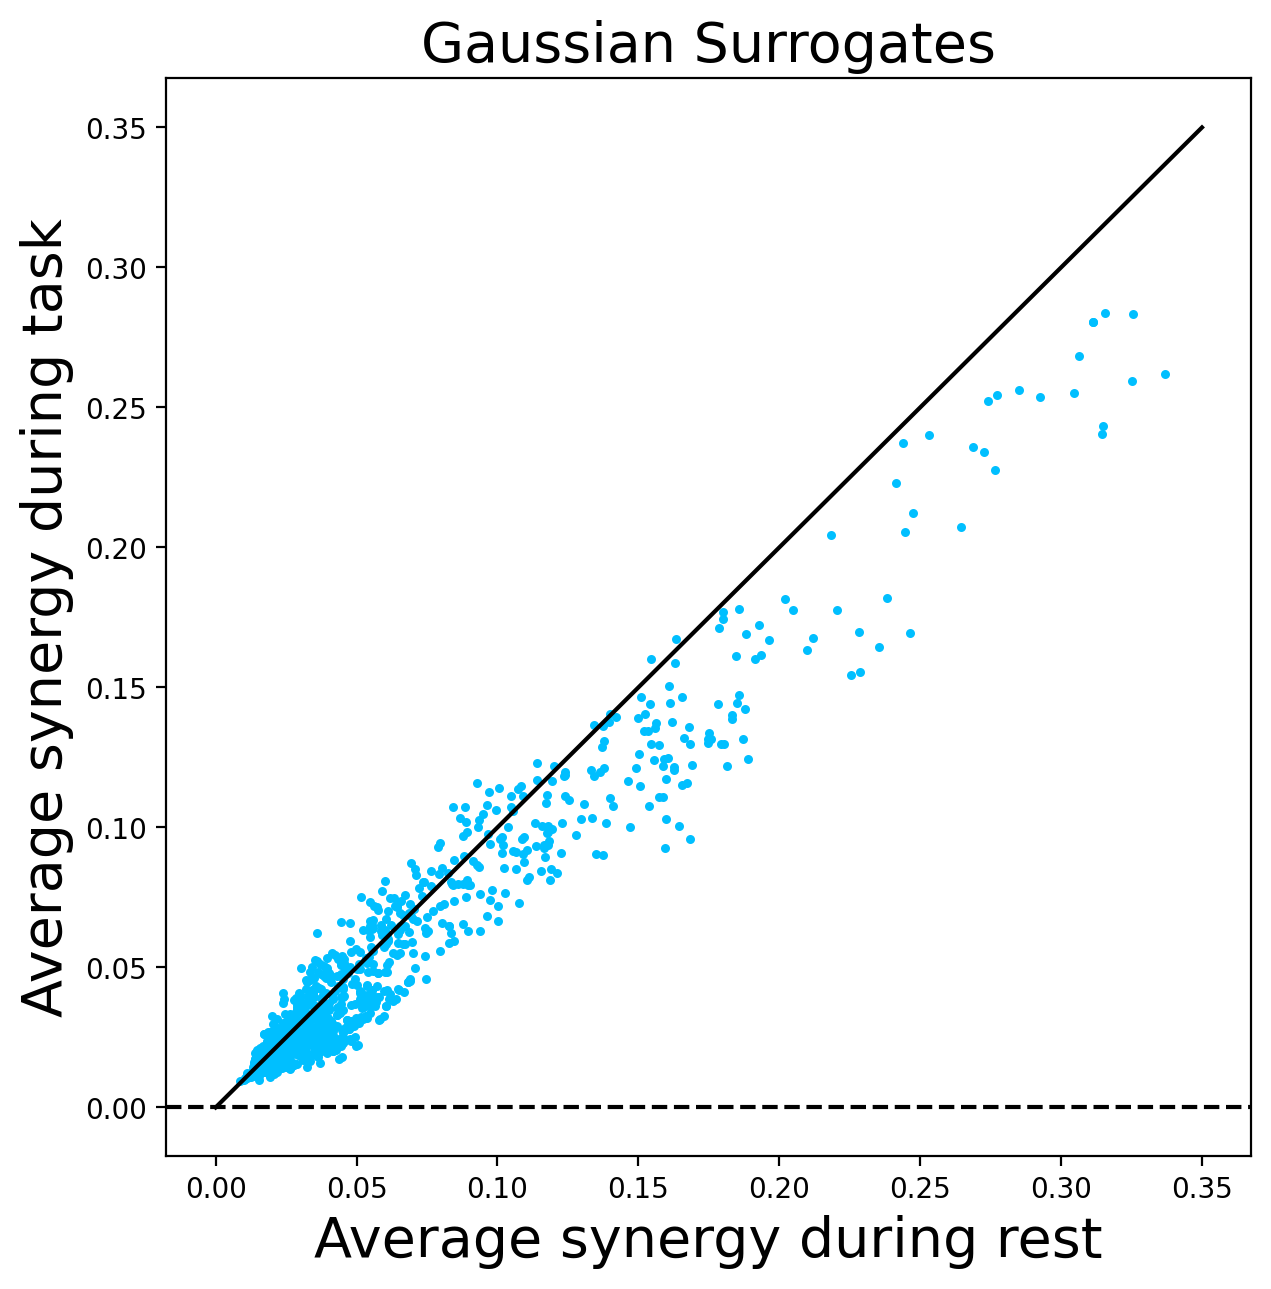

In [11]:
plt.figure(figsize=(7,7))
plt.scatter(global_avgs_rest,global_avgs_task,s=5,c='deepskyblue')
# plt.scatter(mean_task_syn,GlassLambda,s=2,c='deepskyblue')
plt.axhline(c='black',ls='--')
plt.xlabel('Average synergy during rest',fontsize=20)
plt.ylabel('Average synergy during task',fontsize=20)
plt.plot(np.linspace(0,0.35),np.linspace(0,0.35),c='black')
plt.title('Gaussian Surrogates',fontsize=20)

In [10]:
basedf

,source1,source2,target
0,EEG Fp1,EEG F3,EEG F7
1,EEG Fp1,EEG F7,EEG F3
2,EEG F3,EEG F7,EEG Fp1
3,EEG Fp1,EEG F3,EEG T3
4,EEG Fp1,EEG T3,EEG F3
...,...,...,...
985,EEG O2,EEG Pz,EEG Cz
986,EEG Cz,EEG Pz,EEG O2
987,EEG Fz,EEG Cz,EEG Pz
988,EEG Fz,EEG Pz,EEG Cz


In [13]:
# basedf.insert(3, "rest", global_avgs_rest)
# basedf.insert(4, "task", global_avgs_task)

In [15]:
basedf.to_csv(r'G:\My Drive\data_research\NeuNet\PID_Arithmetic\resultsPID\avg_synergies_surrogates_discrete_5symbols.txt')